**TASK 2**

AUTHOR : SOWMIYA S

Objective: To perform data cleaning and exploratory data analysis (EDA) , such as the Titanic dataset from Kaggle and to explore the relationships between variables and identify patterns and trends in the data.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importing the Given Dataset

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanicsurvival.csv")
data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


Data cleaning and exploratory data analysis (EDA)

In [ ]:
data.shape

(891, 5)

There are 891 observations across 5 variables.

In [ ]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Survived'], dtype='object')

These are the columns(Variables) in the dataset.

In [ ]:
# Check for missing values
print(data.isnull().sum())

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64


In [ ]:
#mapping - bin values
data['Sex']=data['Sex'].replace({'male':0 , 'female':1})
data

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,1
888,3,1,NaN,23.4500,0
889,1,0,26.0,30.0000,1


In [ ]:
#filling null values as mean
data.fillna(data.mean(),inplace=True)
data.isnull().values.any()

False

In [ ]:
# List of continuous variables
continuous_variables = ['Pclass', 'Age', 'Fare']

# Selecting only the continuous variables from the DataFrame
continuous_data = data[continuous_variables]

#statistics for numerical features
continuous_data.describe()

,Pclass,Age,Fare
count,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,13.002015,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,7.910400
50%,3.000000,29.699118,14.454200
75%,3.000000,35.000000,31.000000
max,3.000000,80.000000,512.329200


In [ ]:
#correlation
continuous_data.corr(method='pearson')

,Pclass,Age,Fare
Pclass,1.000000,-0.331339,-0.549500
Age,-0.331339,1.000000,0.091566
Fare,-0.549500,0.091566,1.000000


In [ ]:
# Frequency of 'Survived'
survived_freq = data['Survived'].value_counts()
print("Survived Frequency:\n", survived_freq)

# Frequency of 'Pclass'
pclass_freq = data['Pclass'].value_counts()
print("\nPclass Frequency:\n", pclass_freq)

# Frequency of 'Sex'
sex_freq = data['Sex'].value_counts()
print("\nSex Frequency:\n", sex_freq)

Survived Frequency:
 Survived
0    549
1    342
Name: count, dtype: int64

Pclass Frequency:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex Frequency:
 Sex
0    577
1    314
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

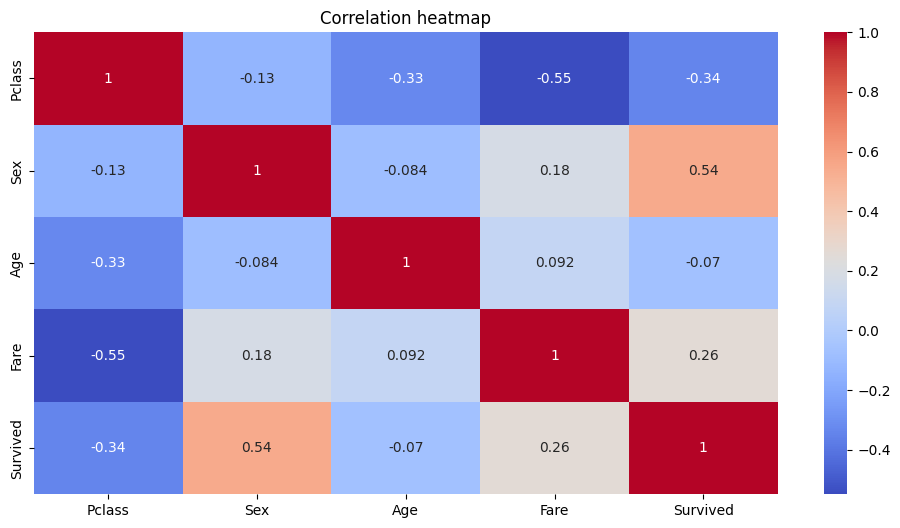

In [ ]:
# HEATMAP:
correlation_matrix=data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show

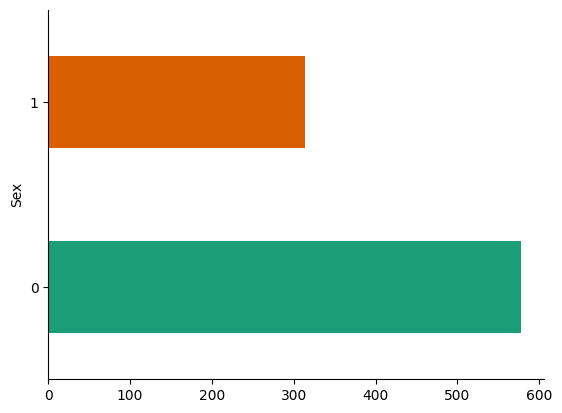

In [ ]:
#Barplot of Sex
data.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

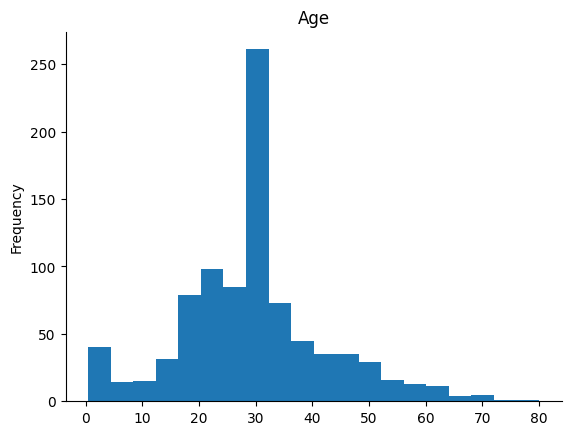

In [ ]:
#Histogram of Age
from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1000x600 with 0 Axes>

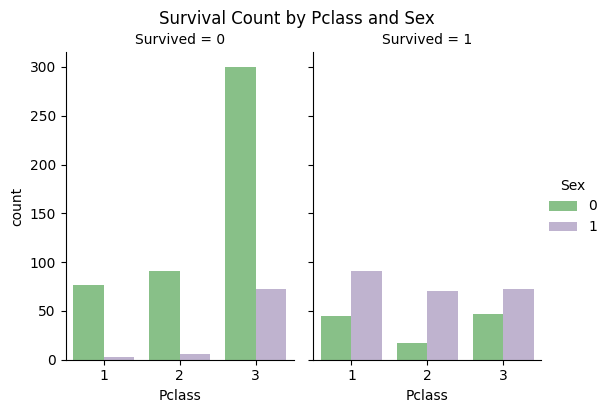

In [ ]:
# Survival rate by 'Pclass' and 'Sex'
plt.figure(figsize=(10, 6))
sns.catplot(data=data, x='Pclass', hue='Sex', col='Survived', kind='count', height=4, aspect=0.7,palette='Accent')
plt.suptitle('Survival Count by Pclass and Sex', y=1.02)
plt.show()